# 文字探勘之資料ETL

## 使用requests.get

In [17]:
import requests
res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1/')
#print res.text
print res.status_code 
print res.headers['content-type']


200
text/html; charset=utf-8


## 使用requests.post

In [18]:
import requests
payload = {
'StartStation':'977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation':'60831846-f0e4-47f6-9b5b-46323ebdcef7',
'SearchDate':'2015/05/27',
'SearchTime':'10:30',
'SearchWay':'DepartureInMandarin'
}
res = requests.post('http://www.thsrc.com.tw/tw/TimeTable/SearchResult', data=payload)
#print res.text

## BeautifulSoup4 範例

In [19]:
from bs4 import BeautifulSoup 
html_sample = ' \
<html> \
 <body> \
 <h1 id="title">Hello World</h1> \
 <a href="#" class="link">This is link1</a> \
 <a href="# link2" class="link">This is link2</a> \
 </body> \
 </html>'

soup = BeautifulSoup(html_sample)
print soup.text


   Hello World This is link1 This is link2  


In [20]:
a = soup.select("a")
print a

link = soup.select(".link")
print link

[<a class="link" href="#">This is link1</a>, <a class="link" href="# link2">This is link2</a>]
[<a class="link" href="#">This is link1</a>, <a class="link" href="# link2">This is link2</a>]


# 使用爬蟲蒐集每日頻果要聞

In [21]:
import requests
from bs4 import BeautifulSoup
import re
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
#for news in soup.select('.rtddt'):
#    print news

## 根據不同HTML標籤取得對應內容

In [22]:
domain = 'http://www.appledaily.com.tw'
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    category = news.select('h2')[0].text 
    time = news.select('time')[0].text 
    url = domain + news.select('a')[0]['href']    
    #print main, category, time, url

In [25]:
domain = 'http://www.appledaily.com.tw'
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    #print title, popularity

In [26]:
import requests
from bs4 import BeautifulSoup
import re
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
domain = 'http://www.appledaily.com.tw'
newsary = []
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    category = news.select('h2')[0].text 
    time = news.select('time')[0].text 
    url = domain + news.select('a')[0]['href']
    dic = {'title': title, 'popularity':popularity,'category':category, 'time':time, 'url':url}
    newsary.append(dic)

## 根據頁數蒐集

In [32]:
import requests
from bs4 import BeautifulSoup

domain = 'http://www.appledaily.com.tw'

newsary = []
url = 'http://www.appledaily.com.tw/realtimenews/section/new/%d'
for page in range(1,2):
    section = requests.get(url%(page))
    soup = BeautifulSoup(section.text)
    for news in soup.select('.rtddt'):    
        main = news.select('h1')[0].text
        m = re.match('(.*)\((\d+)\)',main)
        if m:
            title = m.group(1)
            popularity = int(m.group(2))
        category = news.select('h2')[0].text 
        time = news.select('time')[0].text 
        url = domain + news.select('a')[0]['href']
        dic = {'title': title, 'popularity':popularity,'category':category, 'time':time, 'url':url}
        newsary.append(dic)

## 印出蒐集新聞

In [33]:
print len(newsary)

30


In [34]:
print newsary[0:3]

[{'category': u'\u653f\u6cbb', 'url': u'http://www.appledaily.com.tw/realtimenews/article/politics/20150528/618173/\u639b\u770b\u677f\u300c\u5c0b\u8cf4\u6e05\u5fb7\u300d\u3000\u674e\u5168\u6559\uff1a\u4eca\u6709\u91cd\u5927\u5ba3\u5e03', 'popularity': 0, 'time': u'06:44', 'title': u'\u639b\u770b\u677f\u300c\u5c0b\u8cf4\u6e05\u5fb7\u300d\u3000\u674e\u5168\u6559\uff1a\u4eca\u6709\u91cd\u5927\u5ba3\u5e03'}, {'category': u'\u793e\u6703', 'url': u'http://www.appledaily.com.tw/realtimenews/article/local/20150528/618169/\u7f8e\u9b54\u5973\u5343\u676f\u4e0d\u5012\u3000\u683d\u57281\u676f\u5564\u9152\u7591\u906d\u8ff7\u59e6', 'popularity': 28, 'time': u'06:39', 'title': u'\u7f8e\u9b54\u5973\u5343\u676f\u4e0d\u5012\u3000\u683d\u57281\u676f\u5564\u9152\u7591\u906d\u8ff7\u59e6'}, {'category': u'\u793e\u6703', 'url': u'http://www.appledaily.com.tw/realtimenews/article/local/20150528/618166/\u9ad8\u91ab\u60c5\u6bba\u5167\u5e55\u3000\u91ab\u5b78\u751f\u6bba\u4eba\u5f8c\u8ddf\u5b78\u59b9\u8aaa\u2026',

In [35]:
for news in newsary[0:3]:
    print news['title'], news['time']

掛看板「尋賴清德」　李全教：今有重大宣布 06:44
美魔女千杯不倒　栽在1杯啤酒疑遭迷姦 06:39
高醫情殺內幕　醫學生殺人後跟學妹說… 06:32


# 使用pandas 做敘述性統計

In [36]:
import pandas as pd
newspd = pd.DataFrame(newsary)
newspd.head()

,category,popularity,time,title,url
0,政治,0,06:44,掛看板「尋賴清德」 李全教：今有重大宣布,http://www.appledaily.com.tw/realtimenews/arti...
1,社會,28,06:39,美魔女千杯不倒 栽在1杯啤酒疑遭迷姦,http://www.appledaily.com.tw/realtimenews/arti...
2,社會,598,06:32,高醫情殺內幕 醫學生殺人後跟學妹說…,http://www.appledaily.com.tw/realtimenews/arti...
3,國際,58,06:30,五月二十八日世界各報頭條搶先報,http://www.appledaily.com.tw/realtimenews/arti...
4,社會,269,06:29,毛毛der！正妹頭七 男友同車同地同時死,http://www.appledaily.com.tw/realtimenews/arti...


## 根據人氣排序

In [37]:
newspd.sort(['popularity'], ascending=False).head()

,category,popularity,time,title,url
14,社會,6546,05:54,​AV女優遊夜店 巧遇警臨檢好掃興,http://www.appledaily.com.tw/realtimenews/arti...
25,國際,5156,03:48,南非銷售最好手機 不是蘋果也非三星,http://www.appledaily.com.tw/realtimenews/arti...
28,國際,2889,02:40,神學士稱策畫突襲 整夜槍戰釀4死,http://www.appledaily.com.tw/realtimenews/arti...
27,娛樂,1946,03:16,宇宙人東京鬧區滑板 慘仆街見血,http://www.appledaily.com.tw/realtimenews/arti...
19,社會,1801,04:51,地下室起火上千住戶逃 驚呼好可怕,http://www.appledaily.com.tw/realtimenews/arti...


## 依據各分類排行

In [39]:
df1 = newspd.groupby(['category'], sort=False)['popularity'].max()
print df1

category
政治           552
社會          6546
國際          5156
生活           322
財經           506
論壇           884
娛樂          1946
體育          1363
Name: popularity, dtype: int64


## 抓出各分類最熱門文章

In [40]:
idx = newspd.groupby(['category'])['popularity'].transform(max) == newspd['popularity']
newspd[idx].head()

,category,popularity,time,title,url
10,生活,322,06:17,氣溫回升 新竹以南有局部大雨,http://www.appledaily.com.tw/realtimenews/arti...
13,政治,552,06:08,變電箱一整排很醜 柯文哲指示要美化,http://www.appledaily.com.tw/realtimenews/arti...
14,社會,6546,05:54,​AV女優遊夜店 巧遇警臨檢好掃興,http://www.appledaily.com.tw/realtimenews/arti...
15,財經,506,05:52,五月二十八日財經焦點搶先看,http://www.appledaily.com.tw/realtimenews/arti...
24,論壇,884,04:00,史丹利：無辜的宏都拉斯大使,http://www.appledaily.com.tw/realtimenews/arti...


## 印出每日新聞摘要

In [41]:
for newsurl in newsary[0:1]:    
    res = requests.get(newsurl['url'])
    soup = BeautifulSoup(res.text)
    print soup.select('#summary')[0].text

台南市區昨出現大型「尋人啟事」廣告牆，看板用紅色大字寫「市長賴清德與台南市民意已失聯」、「第142天」、「請190萬台南市民協尋市長賴清德」，引起人車注目。今日出版的《蘋果日報》報導，李全教坦承大字報是他指示張貼，大罵賴清德獨裁，以李涉嫌賄選，從議會一月開定期會就不進議會備詢，至今跟議會失聯一百四十二天，他的賄選案法院仍在審理，希望賴不要以此當藉口。《自由時報》報導，李全教也透露台南市府已經接獲行政院公函，表達依照地制法，台南市市長及官員必須到議會做業務報告及備詢，並同時預告他今天將有「重大宣布」。(葉國吏/綜合報導)


In [42]:
for newsurl in newsary:    
    res = requests.get(newsurl['url'])
    soup = BeautifulSoup(res.text)
    newsurl['summary'] = soup.select('#summary')[0].text

In [43]:
print newsary[0]['summary'][0:100]

台南市區昨出現大型「尋人啟事」廣告牆，看板用紅色大字寫「市長賴清德與台南市民意已失聯」、「第142天」、「請190萬台南市民協尋市長賴清德」，引起人車注目。今日出版的《蘋果日報》報導，李全教坦承大字報


## 從Facebook 討論區了解網民評論

In [44]:
import urllib
import json
print newsary[3]['url']
app_id = '409090199295451'
app_secret = '<secret>'
graph_url  = 'https://graph.facebook.com/v2.3/%s?access_token=%s|%s'%(urllib.quote(newsary[0]['url'].encode('utf8')), app_id, app_secret)
res = requests.get(graph_url)
dt = json.loads(res.text)
post_id =  dt['og_object']['id']
print post_id

http://www.appledaily.com.tw/realtimenews/article/international/20150528/618168/五月二十八日世界各報頭條搶先報
883071741753928


C:\Python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [45]:
post_id = '938417442844934'
import urllib
import json
import pandas as pd
app_id = '409090199295451'
app_secret = '<secret>'
post_url  = 'https://graph.facebook.com/v2.3/%s/comments?access_token=%s|%s'%(post_id, app_id, app_secret)
res = requests.get(post_url)
json_data = json.loads(res.text)
#print json_data['data']
#df = pd.read_json(json_data['data'])



C:\Python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [46]:
print json_data

{u'paging': {u'cursors': {u'after': u'Mg==', u'before': u'NA=='}}, u'data': [{u'from': {u'id': u'10204704242467035', u'name': u'Joy Chien'}, u'like_count': 0, u'can_remove': False, u'created_time': u'2015-05-25T17:44:09+0000', u'message': u'\u770b\u5f71\u7247\u767c\u73fe\u5c0f\u8ca8\u8eca\u6703\u6025\u715e\u6253\u6ed1\n\u662f\u56e0\u70ba\u524d\u8eca\u6025\u715e\n\u5c0f\u8ca8\u8eca\u6253\u6ed1\u5f8c\u524d\u8eca\u715e\u8eca\u71c8\u9084\u4eae\u8457\n\u7136\u5f8c\u98db\u901f\u5f80\u524d\u884c\u99db\n\u6240\u4ee5\u96e8\u5929\u8eca\u591a\u6642\u9084\u662f\u76e1\u91cf\u4fdd\u6301\u5b89\u5168\u8ddd\u96e2\u5427', u'id': u'938417442844934_938572532829425', u'user_likes': False}, {u'from': {u'id': u'1006511392693378', u'name': u'Daniel Shih'}, u'like_count': 1, u'can_remove': False, u'created_time': u'2015-05-25T15:48:54+0000', u'message': u'\u9019\u500b\u8def\u6bb5\u4e09\u5929\u5169\u982d\u7684\u5c31\u6709\u4e8b\u6545\u767c\u751f,\u660e\u660e\u662f\u9053\u8def\u8a2d\u8a08\u4e0d\u826f\u537b\u4e00

In [47]:
dtarray = []
for comment in json_data['data']:
    dtarray.append( {'created_time':comment['created_time'], 'name':comment['from']['name'], \
          'message':comment['message'], 'like_count':comment['like_count']})
posts_df = pd.DataFrame(dtarray)
posts_df.head()

,created_time,like_count,message,name
0,2015-05-25T17:44:09+0000,0,看影片發現小貨車會急煞打滑\n是因為前車急煞\n小貨車打滑後前車煞車燈還亮著\n然後飛速往前...,Joy Chien
1,2015-05-25T15:48:54+0000,1,"這個路段三天兩頭的就有事故發生,明明是道路設計不良卻一直擺著不去改善!\n因為車流量過大常常...",Daniel Shih
2,2015-05-25T13:06:45+0000,0,又是貨車界的神車出糗了。,Reginald Ben


# 使用資料庫管理新聞內容

## 建立表格存放新聞

In [49]:
# -*- coding: utf-8 -*- 
import sqlite3

db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('''DROP TABLE IF EXISTS news_entry''')
cur.execute('''CREATE TABLE IF NOT EXISTS news_entry(
                id INTEGER PRIMARY KEY,
                category TEXT,
                popularity INTEGER,
                time VARCHAR(32),
                title VARCHAR(256),
                summary TEXT,
                url VARCHAR(1024)
                )''')
cur.close()

## 新增一筆資料進SQLite

In [50]:
col = ', ' .join(newsary[0].keys())
val = ','.join('?'* (len(newsary[0].keys())))

sql = 'insert into news_entry(%s) values(%s)'%(col, val)
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute(sql,newsary[0].values())
cur.execute('select * from news_entry')
rec = cur.fetchone()
print rec[4]            
cur.close()
db.close()

掛看板「尋賴清德」　李全教：今有重大宣布


## 將全部資料放進SQLite

In [51]:

db = sqlite3.connect('news.db') 

cur = db.cursor()

delete_sql = 'delete from news_entry'
cur.execute(delete_sql)

for news in newsary:
    col = ', ' .join(news.keys())
    val = ','.join('?'* (len(news.keys())))
    sql = 'insert into news_entry(%s) values(%s)'%(col, val)
    cur.execute(sql,news.values())
    db.commit()
          
cur.close()
db.close()

## 讀取表格中的所有資料

In [53]:
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
for rec in allNews:
    print rec[0], rec[1], rec[2], rec[3], rec[4]
cur.close()
db.close()

1 政治 0 06:44 掛看板「尋賴清德」　李全教：今有重大宣布
2 社會 28 06:39 美魔女千杯不倒　栽在1杯啤酒疑遭迷姦
3 社會 598 06:32 高醫情殺內幕　醫學生殺人後跟學妹說…
4 國際 58 06:30 五月二十八日世界各報頭條搶先報
5 社會 269 06:29 毛毛der！正妹頭七　男友同車同地同時死
6 政治 243 06:25 五月二十八日各報頭條搶先報
7 社會 283 06:25 警消51天找嘸　山友靠「尋音」2天找到
8 社會 736 06:24 私娼寮偽裝神壇　阿公一早就去嫖妓
9 社會 901 06:18 劈腿女主播後愛陳敏薰　王燕軍「劈腿被打腿...
10 社會 962 06:17 【更新】印刷公司深夜冒火　警消急搶救未釀...
11 生活 322 06:17 氣溫回升　新竹以南有局部大雨
12 社會 722 06:16 大立光6內鬼竊密跳槽　光紅利就少領200...
13 社會 633 06:10 愛子山難母寫百萬字報告　創山難搜救不力國...
14 政治 552 06:08 變電箱一整排很醜　柯文哲指示要美化
15 社會 6546 05:54 ​AV女優遊夜店　巧遇警臨檢好掃興
16 財經 506 05:52 五月二十八日財經焦點搶先看
17 國際 483 05:40 陸漢怒吞水果刀　忍痛一周才求醫
18 國際 1508 05:29 藍寶堅尼義大利生產　打入豪華休旅車市場
19 國際 1044 05:17 FIFA收賄　贓款藏香港等地
20 社會 1801 04:51 地下室起火上千住戶逃　驚呼好可怕
21 國際 402 04:40 周永康案　分析稱在五中全會前結審
22 國際 378 04:28 英前首相布萊爾　辭任中東和平特使
23 國際 458 04:21 聯合國提議　成員國再收4萬難民
24 論壇 396 04:00 Choyce：上湧別春爛漫 鬱金香繽紛登...
25 論壇 884 04:00 史丹利：無辜的宏都拉斯大使 
26 國際 5156 03:48 南非銷售最好手機　不是蘋果也非三星
27 國際 934 03:34 衝突又起　以色列警告巴勒斯坦將付代價
28 娛樂 1946 03:16 宇宙人東京鬧區滑板　慘仆街見血
29 國際 2889 02:40 神學士稱策畫突襲　整夜槍戰釀4死
30 體育 1

## 產生 2-gram

In [55]:
input_sentence='那我們酸民婉君也可以報名嗎'

sentence  = input_sentence.decode('utf-8')

for i in range(0, len(sentence) - 2 + 1):
    print sentence[i:i+2]

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嗎


## 產生 3-gram

In [57]:
for i in range(0, len(sentence) -3 + 1):
    print sentence[i:i+3]

那我們
我們酸
們酸民
酸民婉
民婉君
婉君也
君也可
也可以
可以報
以報名
報名嗎


## 建立 n-gram 函式

In [58]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

## 測試 bigram

In [59]:
for word in ngram('酸民婉君也可以報名嗎'):
    print word,

婉君 報名 可以 名嗎 君也 也可 民婉 酸民 以報


## 測試 trigram

In [60]:
for word in ngram('那我們酸民婉君也可以報名嗎?' ,n=3):
    print word

酸民婉
君也可
名嗎?
可以報
也可以
們酸民
以報名
民婉君
報名嗎
那我們
婉君也
我們酸


## 移除標點符號

In [61]:
sentence = '123?'
skip_word = '.?'
len([word for word in sentence if word in skip_word]) > 0

True

In [62]:
skip_dic = '?.,、　「！】？：《」》～【'.decode('utf-8')
def ngram(input_sentence, n = 2, skip_word= skip_dic):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        invalid = len([word for word in sentence[i:i+n] if word in skip_word])
        if sentence[i:i+n] not in word_dic and invalid ==0:
            word_dic[sentence[i:i+n]] = 1
        elif invalid ==0:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

In [248]:
for word in ngram('那我們酸民、婉君也可以報名嗎?'):
    print word

我們
婉君
報名
們酸
可以
名嗎
君也
也可
那我
酸民
以報


In [65]:
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
dic = {}
for rec in allNews:
    ngram_dic = ngram(rec[4].encode('utf-8'))
    for ele in ngram_dic:
        if ele not in dic:
            dic[ele] = ngram_dic[ele]
        else:
            dic[ele] = dic[ele] + ngram_dic[ele]
cur.close()
db.close()

In [66]:
import operator
words_freq = sorted(dic.iteritems(),key=operator.itemgetter(1),reverse=True)
    
for word in words_freq:
    if word[1] >= 2:
        print word[0], word[1]

搶先 3
五月 3
八日 3
二十 3
十八 3
月二 3
天找 2
頭條 2
警消 2
山難 2
先報 2
報頭 2
劈腿 2
條搶 2
各報 2


# 長詞優先演算法

## 如何依標點符號切開字詞

In [67]:
import re
delimiter = "，|。|、"  
text = '3年前就讀高雄應用大學二年級的陳顯佳，為閃避跨越雙黃線來車，撞上路邊、摔斷頸椎，頸部以下全癱，嘴被插管，父母每天去看他，他都意識清醒、眨眼流淚，17天後他因頸椎受損抑制呼吸，醫師用盡強力針與電擊都無效，'
for i in re.split(delimiter, text):
    print i

3年前就讀高雄應用大學二年級的陳顯佳
為閃避跨越雙黃線來車
撞上路邊
摔斷頸椎
頸部以下全癱
嘴被插管
父母每天去看他
他都意識清醒
眨眼流淚
17天後他因頸椎受損抑制呼吸
醫師用盡強力針與電擊都無效



## 測試切除效果

In [68]:
def splitSentense(text, delimiter):
    return re.split(delimiter, text)
    
delimiter = "，|。|、|（|）|／|《|》|】|【|「|」|；|：".decode('utf-8')  
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
sentenceAry = []
for rec in allNews:
    text = rec[5]
    sentenceAry += splitSentense(text,delimiter)
cur.close()
db.close()

In [69]:
for sentence in sentenceAry[0:8]:
    print sentence

台南市區昨出現大型
尋人啟事
廣告牆
看板用紅色大字寫
市長賴清德與台南市民意已失聯


第142天


## 移除關鍵字

In [70]:
def removeKey(text, keyword):
    textAry= text
    for key in keyword:
        textAry = ''.join(textAry.split(key.decode('utf-8')))
    return textAry
print sentenceAry[0]
print removeKey(sentenceAry[0], ['民進黨', '後天'])

台南市區昨出現大型
台南市區昨出現大型


In [73]:

a = '民進黨後天將公布'.decode('utf-8')
removeKey(a, ['民進黨', '後天'])

u'\u5c07\u516c\u5e03'

## 修改ngram 處理函式

In [74]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence
    for i in range(0, len(sentence) - n + 1):        
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

## 依長詞優先產生關鍵字

In [75]:
keywords=[]        
ret_terms={}
words_freq    = []
for term_length in range(4,1,-1):
    word_dic = {}
    for sentence in sentenceAry:
        text_list = removeKey(sentence,keywords)        
        ngram_words = ngram(text_list,term_length) 
        for word in ngram_words:
            if word not in word_dic:
                word_dic[word] = 1
            else:
                word_dic[word] += ngram_words[word]   
    for word in word_dic:
        if word_dic[word] >= 5:
            keywords.append(word.encode('utf-8'))            
            ret_terms.update({word:word_dic[word]})

sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 
for term in sorted_terms[0:30]:
    print term[0], term[1]

報導 18
表示 17
景氣 15
美國 14
台灣 14
一個 13
萬元 13
警方 13
綜合 13
藍燈 13
國賠 12
綜合報導 12
時間 12
26 11
難民 11
外電報導 10
搜救 10
山難搜救 10
夜店 10
今年 10
合外電報 10
襲擊 10
手機 10
男子 10
生產 10
綜合外電 10
今日出版 9
逮捕 9
日出版的 9
以色列 9


## 使用jieba

In [76]:
import jieba

sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\david\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\david\appdata\local\temp\jieba.cache
Loading model cost 1.05099987984 seconds.
DEBUG:jieba:Loading model cost 1.05099987984 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


大
巨蛋
案對
市府
同仁
下
封口令
？
　
柯
P
否認


In [77]:
jieba.add_word('柯P',100)
jieba.add_word('大巨蛋',100)
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

大巨蛋
案對
市府
同仁
下
封口令
？
　
柯P
否認


In [78]:
import jieba.posseg as pseg
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = pseg.cut(sentence)

for word in words:
    print word.word, word.flag

大巨蛋 x
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　x
柯P x
否認 v


In [79]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]

大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　14 15
柯P 15 17
否認 17 19


In [80]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 1)
print ",".join(tags)

封口令


In [81]:
sentence = "由身負聯合作戰指揮官之參謀總長主導下"
words = jieba.cut(sentence)
for word in words:
    print word

由身
負聯
合作
戰指揮官
之
參謀
總長
主導下


In [82]:
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)         
for i in vectorizer.get_feature_names():
    print i

柯p
洪智坤


In [83]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()    
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    
word = vectorizer.get_feature_names() 
weight = tfidf.toarray()    
print weight

[[ 0.70710678  0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]]


In [84]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
domain = 'http://www.appledaily.com.tw'
worddic = {}
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    for wd in jieba.cut(title):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1


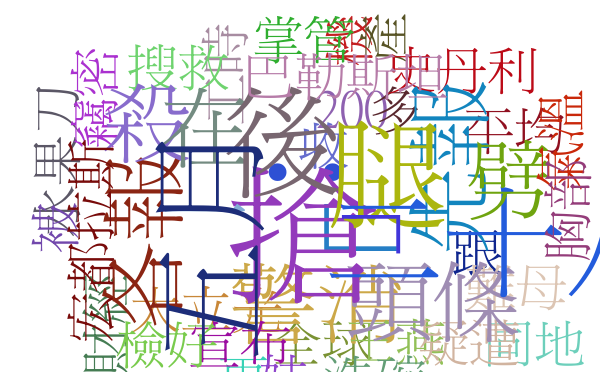

In [86]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50] if w[0] not in '【】...'.decode('utf-8')]

tags = make_tags(swd, maxsize=120)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='tw')
Image(filename='wc.png') 
